In [1]:
from array import array
import math
import numpy as np
import random

In [2]:
def fitfunction(x,par):
    return par[0]*x/(par[1]+x)

def fitfunction_python(x,*par):
    return par[0]*x/(par[1]+x)

def fitfunction_root(x,par):
    return par[0]*x[0]/(par[1]+x[0])

In [3]:
def jacobian_beta1(x,par):
    return -x/(par[1]+x)

In [4]:
def jacobian_beta2(x,par):
    return par[0]*x/((par[1]+x)*(par[1]+x))

In [5]:


par_actual = array('d')
par_actual.append(0.3797)
par_actual.append(0.5111)

beta_order = 2 #Set the order of the polynomial
m = 7 #Set the number of data points
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

x.append(0.038)
x.append(0.194)
x.append(0.425)
x.append(0.626)
x.append(1.253)
x.append(2.500)
x.append(3.740)

In [6]:
random.seed(1)

for i in range(0,m):
    r = random.gauss(0.0,0.005)
    y.append(fitfunction(x[i],par_actual)+r)
    ex.append(0)
    ey.append(0.005)

In [7]:
n = beta_order

Jacobian = np.zeros(shape = (m,n))
Jacobian2 = np.zeros(shape = (m,n))
JacobianT = np.zeros(shape = (n,m))
Weights = np.zeros(shape = (m,m))
JTW = np.zeros(shape = (n,m))
WJ = np.zeros(shape = (m,n))
residuals = np.zeros(shape = (m,1))
JTWr = np.zeros(shape = (n,1))
JTWJ = np.zeros(shape = (n,n))
JTWJInv = np.zeros(shape = (n,n))

betas = np.zeros(shape = (n,1))
Delta = np.zeros(shape = (n,1))

In [8]:
betas[0][0] = 0.90
betas[1][0] = 0.20

parameter_matrix = array('d')
parameter_matrix_dbeta = array('d')
parameter_matrix.append(betas[0][0])
parameter_matrix.append(betas[1][0])
parameter_matrix_dbeta.append(betas[0][0])
parameter_matrix_dbeta.append(betas[1][0])

dbetamax = 10000
dbeta = 0
epsilon = 0.000001
epsilon_beta = 0.005

jacobian_flag = 1

In [9]:
while (dbetamax > epsilon):
    for i in range(0,m):
        function_value = fitfunction(x[i],parameter_matrix)
        residuals[i][0]=y[i]-function_value
        
        for k in range(0,m):
            if (i==k):
                Weights[i][k]=1.0/(ey[i]*ey[i])
            else:
                Weights[i][k]=0.0
                
        if (jacobian_flag == 1):
            for j in range(0,n):
                for k in range(0,n):
                    if (k==j):
                        parameter_matrix_dbeta[k]=parameter_matrix[k]+epsilon_beta
                    else:
                        parameter_matrix_dbeta[k]=parameter_matrix[k]
                f0 = fitfunction(x[i],parameter_matrix)
                f1 = fitfunction(x[i],parameter_matrix_dbeta)
                jacobian = (f0-f1)/epsilon_beta
                Jacobian[i][j]=jacobian
                #print(i,j,jacobian)
                #print(parameter_matrix[0],parameter_matrix_dbeta[0])
                #print(parameter_matrix[1],parameter_matrix_dbeta[1])
                #print(f0,f1)    
        else:
            for j in range(0,n):
                if (j==0):
                    jacobian = jacobian_beta1(x[i],parameter_matrix)
                else:
                    jacobian = jacobian_beta2(x[i],parameter_matrix)
                Jacobian[i][j]=jacobian
                #print(i,j,jacobian)
            
    JacobianT = Jacobian.transpose()
    JTW = np.array(np.matrix(JacobianT)*np.matrix(Weights))
    JTWr = np.array(np.matrix(JTW)*np.matrix(residuals))
    WJ = np.array(np.matrix(Weights)*np.matrix(Jacobian))
    JTWJ = np.array(np.matrix(JacobianT)*np.matrix(WJ))
    JTWJInv = np.array(np.linalg.inv(JTWJ))
    Delta = np.array(np.matrix(JTWJInv)*np.matrix(JTWr))

    dbetamax = 0.0
    
    for j in range(0,n):
        parameter_matrix[j]=parameter_matrix[j]-Delta[j][0]
        dbeta = math.fabs(Delta[j][0]/parameter_matrix[j])
        if (dbeta > dbetamax): 
            dbetamax = dbeta
        #print ("dbetamax = %f" % dbetamax )

In [10]:
print(Jacobian)
print(" ")

print(JacobianT)
print(" ")

print(JTWr)
print(" ")

print(JTWJ)
print(" ")

print(JTWJInv)
print(" ")


[[-0.07288012  0.05141082]
 [-0.28638737  0.1558393 ]
 [-0.46785342  0.19020048]
 [-0.56426685  0.18802111]
 [-0.72160619  0.15387408]
 [-0.83796893  0.10412461]
 [-0.88554158  0.07776734]]
 
[[-0.07288012 -0.28638737 -0.46785342 -0.56426685 -0.72160619 -0.83796893
  -0.88554158]
 [ 0.05141082  0.1558393   0.19020048  0.18802111  0.15387408  0.10412461
   0.07776734]]
 
[[-0.00048757]
 [-0.00017548]]
 
[[105268.17817261 -20424.52611625]
 [-20424.52611625   5560.96192737]]
 
[[3.30555000e-05 1.21407579e-04]
 [1.21407579e-04 6.25735674e-04]]
 


In [11]:
error_sum = 0
yfit = 0
error = array('d')

for j in range(0,m):
    yfit = fitfunction(x[j],parameter_matrix)
    print ("i x y fit = %d %f %f %f " % (j,x[j],y[j],yfit))
    error_sum = error_sum + (yfit-y[j])*(yfit-y[j])/(ey[j]*ey[j])
    yfit = 0

print (" ")
    
chi2 = error_sum/(m-n)
print ("chi2/dof = %f / %f" % (error_sum,(m-n)))

for k in range(0,n):
        error.append(math.sqrt(JTWJInv[k][k]))
        print(" beta[%d] = %f +/- %f" % ((k+1),parameter_matrix[k],error[k]))


i x y fit = 0 0.038000 0.032718 0.027063 
i x y fit = 1 0.194000 0.111717 0.106345 
i x y fit = 2 0.425000 0.172720 0.173730 
i x y fit = 3 0.626000 0.205211 0.209531 
i x y fit = 4 1.253000 0.264231 0.267957 
i x y fit = 5 2.500000 0.315407 0.311166 
i x y fit = 6 3.740000 0.328939 0.328832 
 
chi2/dof = 4.495800 / 5.000000
 beta[1] = 0.371334 +/- 0.005749
 beta[2] = 0.483404 +/- 0.025015


[0.37131744 0.48331875] [[2.95647157e-05 1.07953631e-04]
 [1.07953631e-04 5.54319840e-04]]
Coefficients (from curve_fit)
[0.37131744 0.48331875]
Covariance Matrix (from curve_fit)
[[2.95647157e-05 1.07953631e-04]
 [1.07953631e-04 5.54319840e-04]]
Chi^2 / dof = 2.428E+00 / 0
Fit Parameter 0: 3.713E-01 +/- 5.437E-03
0 1 8.433E-01
Fit Parameter 1: 4.833E-01 +/- 2.354E-02


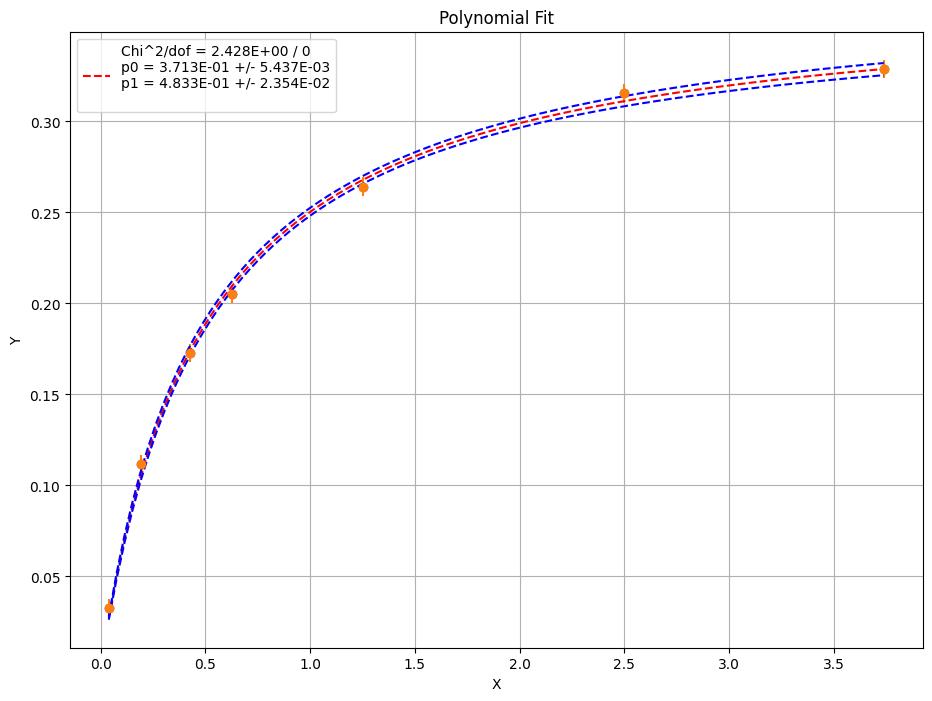

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.plot(x,y,'o')

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.3, 0.75]
popt, pcov = curve_fit(fitfunction_python,x,y,sigma=ey,p0=init_vals,absolute_sigma=False)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction_python(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction_python(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction_python(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

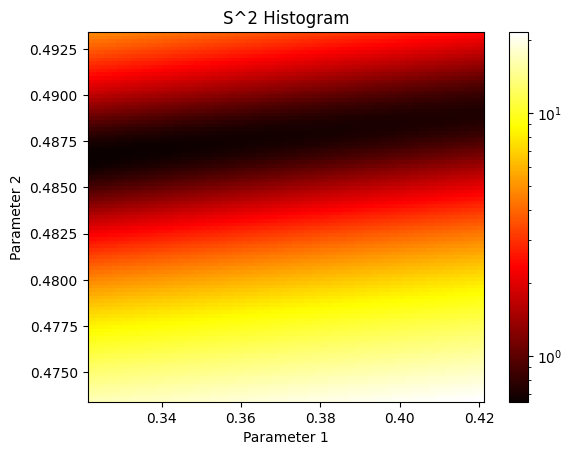

In [13]:
from matplotlib.colors import LogNorm

nbins = 101
xwidth = 0.025
ywidth = 0.005
xlow = parameter_matrix[0] - 2*xwidth
xhigh = parameter_matrix[0] + 2*xwidth
ylow = parameter_matrix[1] - 2*ywidth
yhigh = parameter_matrix[1] + 2*ywidth

b1 = np.linspace(xlow, xhigh, nbins)
b2 = np.linspace(ylow, yhigh, nbins)
sums = np.zeros((nbins, nbins))

for j in range(nbins):
    for k in range(nbins):
        pars = [b1[j], b2[k]]
        total_sum = 0.0
        for i in range(n):
            yfit = fitfunction(x[i], pars)
            total_sum += ((yfit - y[i])/ey[i]) ** 2
        sums[j][k] = total_sum

fig, ax = plt.subplots()

# Create a meshgrid of b1 and b2
B1, B2 = np.meshgrid(b1, b2)

# Plot the sums as a color map
im = ax.imshow(sums, norm=LogNorm(),extent=[xlow, xhigh, ylow, yhigh], origin='lower', aspect='auto', cmap='hot')

# Set labels and title
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_title('S^2 Histogram')

# Add a colorbar
cbar = fig.colorbar(im)

plt.show()
